In [1]:
# Install required packages
%pip install joblib pandas numpy scikit-learn xgboost matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import warnings
import joblib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Section 1: Dataset Selection and Loading**


**Requirements**:
*   ONE classification dataset of your choice from any public repository Kaggle or UCI
*   Binary or a multi-classification problem
*   Minimum Feature Size: 12
*   Minimum Instance Size: 500



In [4]:
#Import the dataset
data= pd.read_csv('data/default_of_credit_card_clients.csv')

# Dataset information
dataset_name = "Default of Credit Card Clients"  # dataset name
dataset_source = "https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients"  # e.g., "UCI ML Repository"
n_samples = 30000      # Total number of rows
n_features = 23     # Number of features (excluding target)
problem_type = "Binary_classification"  # "binary_classification" or "multiclass_classification"

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")

Dataset: Default of Credit Card Clients
Source: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
Samples: 30000, Features: 23
Problem Type: Binary_classification


# Section 2: Data Preprocessing

Preprocess the data:
*   Handle missing values
*   Encode categorical variables
*   Split into train/test sets
*   Scale features

In [5]:
data.shape

(30000, 25)

In [6]:
#Check the columns for features and target, presence of null values, data types for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#Check the descriptive statistics and 5 point summary of features and target for the dataset
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
#Check the top level content of features and target for the dataset
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
#Check if any attributes contains the missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
#Check if any attributes contains the duplicate values
data.duplicated().sum()

np.int64(0)

In [12]:
#Check the data types of attributes
print(data.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [13]:
# Drop ID column as it is not adding any value
if "ID" in data.columns:
        data = data.drop(columns=["ID"])

In [14]:
data.shape

(30000, 24)

In [15]:
# Drop missing rows
data = data.dropna().reset_index(drop=True)

In [16]:
data.shape

(30000, 24)

In [17]:
TARGET_COL = "default payment next month"

In [18]:
data[TARGET_COL] = data[TARGET_COL].astype(int)

In [19]:
print(data.dtypes)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [20]:
#Check if there is an imbalance of target variable values to avoid biasing of model training towards majority values of the target values.
display(data[TARGET_COL].value_counts(normalize=True) * 100)

default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64

In [21]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


2. Encode categorical variables

In [22]:
# Convert categorical-like columns to category type (if they are not already)
model_df = data.copy()

model_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


3. Split into train/test sets

In [23]:
# Separation of features and target ('Outcome' in this case)
# Now use balanced_data for train/test splitting:
X = model_df.drop(TARGET_COL, axis=1)
y = model_df[TARGET_COL]

# Treat these as categorical (integer-coded categories)
CATEGORICAL_COLS = ["SEX", "EDUCATION", "MARRIAGE"]

# Determine categorical/numeric columns that actually exist
cat_cols = [c for c in CATEGORICAL_COLS if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols]


# TODO: Train-test split
# Split the dataset into training and testing sets.
# test_size=0.2: 20% of the data is reserved for testing.
# random_state=42: ensures the split is reproducible every time.
# stratify=y: preserves the original class distribution in both train and test sets,
#             which is very important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Display the shapes of the split datasets to confirm correct dimensions.
# X_train, X_test show feature dimensions.
# y_train, y_test show label dimensions.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

4. Scale features

In [24]:
# -----------------------------
# 4) PREPROCESSOR (OneHot + Scaling)
# -----------------------------
# - Scale numeric columns
# - OneHot encode categorical columns
# handle_unknown='ignore' prevents Streamlit upload from crashing due to unseen categories
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder="drop"
)

In [25]:
#Fill these after preprocessing
train_samples = 24000       # Number of training samples
test_samples = 6000       # Number of test samples
train_test_ratio = 0.8  # 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 24000
Test samples: 6000
Split ratio: 80.0%


# Section 3: Machine Learning Classification models and Evaluation metrics

**Requirements**:
Implement the following classifi cation models using the dataset chosen above. All the 6 ML models have to be implemented on the same dataset.
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor Classifier
4. Naive Bayes Classifier - Gaussian or Multinomial
5. Ensemble Model - Random Forest
6. Ensemble Model - XGBoost

For each of the models above, calculate the following evaluation metrics:
1. Accuracy
2. AUC Score
3. Precision
4. Recall
5. F1 Score
6. Matthews Correlation Coeffi cient (MCC Score)


In [26]:
# -----------------------------
# 5) TRAIN + EVALUATE EACH MODEL ONE BY ONE
# -----------------------------
results = []  # store metrics for final comparison

In [27]:
# Define RANDOM_STATE (moved here for clarity as it was used but not explicitly defined in the execution context)
RANDOM_STATE = 42

# Create 'models' and 'artifacts' directories if they don't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('artifacts'):
    os.makedirs('artifacts')

# ===== MODEL 1: Logistic Regression =====
print("\n==============================")
print("Model 1: Logistic Regression")
print("==============================")

pipe_lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE))
])

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
y_prob = pipe_lr.predict_proba(X_test)[:, 1]

lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(lr_metrics)
results.append(lr_metrics)

joblib.dump(pipe_lr, "model/logistic_regression.pkl")
print("Saved -> models/logistic_regression.joblib")



Model 1: Logistic Regression
{'Model': 'Logistic Regression', 'Accuracy': 0.6781666666666667, 'AUC': 0.7105606434759414, 'Precision': 0.36765994741454866, 'Recall': 0.6322532027128862, 'F1': 0.4649487392629537, 'MCC': 0.27652775701748744}
Saved -> models/logistic_regression.joblib


In [28]:
# ===== MODEL 2: Decision Tree =====
print("\n==============================")
print("Model 2: Decision Tree")
print("==============================")

pipe_dt = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(class_weight="balanced", random_state=RANDOM_STATE))
])

pipe_dt.fit(X_train, y_train)

y_pred = pipe_dt.predict(X_test)
y_prob = pipe_dt.predict_proba(X_test)[:, 1]


dt_metrics = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(dt_metrics)
results.append(dt_metrics)

joblib.dump(pipe_dt, "model/decision_tree.pkl")
print("Saved -> models/decision_tree.pkl")



Model 2: Decision Tree
{'Model': 'Decision Tree', 'Accuracy': 0.7313333333333333, 'AUC': 0.6123640577571197, 'Precision': 0.3940520446096654, 'Recall': 0.39939713639789, 'F1': 0.3967065868263473, 'MCC': 0.22391204769347098}
Saved -> models/decision_tree.pkl
{'Model': 'Decision Tree', 'Accuracy': 0.7313333333333333, 'AUC': 0.6123640577571197, 'Precision': 0.3940520446096654, 'Recall': 0.39939713639789, 'F1': 0.3967065868263473, 'MCC': 0.22391204769347098}
Saved -> models/decision_tree.pkl


In [29]:
# ===== MODEL 3: kNN =====
print("\n==============================")
print("Model 3: kNN")
print("==============================")

pipe_knn = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=15, weights="distance"))
])

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
y_prob = pipe_knn.predict_proba(X_test)[:, 1]

knn_metrics = {
    "Model": "kNN",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(knn_metrics)
results.append(knn_metrics)

joblib.dump(pipe_knn, "model/knn.pkl")
print("Saved -> models/knn.pkl")



Model 3: kNN
{'Model': 'kNN', 'Accuracy': 0.8103333333333333, 'AUC': 0.7285078658186627, 'Precision': 0.6251655629139072, 'Recall': 0.3556895252449133, 'F1': 0.45341018251681076, 'MCC': 0.36931658118176647}
Saved -> models/knn.pkl
{'Model': 'kNN', 'Accuracy': 0.8103333333333333, 'AUC': 0.7285078658186627, 'Precision': 0.6251655629139072, 'Recall': 0.3556895252449133, 'F1': 0.45341018251681076, 'MCC': 0.36931658118176647}
Saved -> models/knn.pkl


In [30]:
# ===== MODEL 4: Naive Bayes (GaussianNB) =====
print("\n==============================")
print("Model 4: Naive Bayes (Gaussian)")
print("==============================")

pipe_nb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", GaussianNB())
])


pipe_nb.fit(X_train, y_train)

y_pred = pipe_nb.predict(X_test)
y_prob = pipe_nb.predict_proba(X_test)[:, 1]

nb_metrics = {
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(nb_metrics)
results.append(nb_metrics)

joblib.dump(pipe_nb, "model/naive_bayes.pkl")
print("Saved -> models/naive_bayes.pkl")


Model 4: Naive Bayes (Gaussian)
{'Model': 'Naive Bayes', 'Accuracy': 0.29033333333333333, 'AUC': 0.7240017893683205, 'Precision': 0.23398075875839536, 'Recall': 0.9713639788997739, 'F1': 0.37712112346401405, 'MCC': 0.10341924892135188}
Saved -> models/naive_bayes.pkl


In [31]:
# ===== MODEL 5: Random Forest =====
print("\n==============================")
print("Model 5: Random Forest")
print("==============================")

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=100,          # reduce from 400/500/1000
        max_depth=12,              # limit depth
        min_samples_leaf=2,        # prevents tiny leaf splits
        min_samples_split=5,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ))
])

pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)
y_prob = pipe_rf.predict_proba(X_test)[:, 1]

rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(rf_metrics)
results.append(rf_metrics)

joblib.dump(pipe_rf, "model/random_forest.pkl")
print("Saved -> models/random_forest.pkl")


Model 5: Random Forest
{'Model': 'Random Forest', 'Accuracy': 0.7931666666666667, 'AUC': 0.7730471075077193, 'Precision': 0.532185628742515, 'Recall': 0.5357950263752826, 'F1': 0.5339842283139317, 'MCC': 0.40107789260961707}
Saved -> models/random_forest.pkl
{'Model': 'Random Forest', 'Accuracy': 0.7931666666666667, 'AUC': 0.7730471075077193, 'Precision': 0.532185628742515, 'Recall': 0.5357950263752826, 'F1': 0.5339842283139317, 'MCC': 0.40107789260961707}
Saved -> models/random_forest.pkl


In [32]:
# ===== MODEL 6: XGBoost =====
print("\n==============================")
print("Model 6: XGBoost")
print("==============================")

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        eval_metric="logloss",
        n_jobs=-1
    ))
])

pipe_xgb.fit(X_train, y_train)

y_pred = pipe_xgb.predict(X_test)
y_prob = pipe_xgb.predict_proba(X_test)[:, 1]

xgb_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1": f1_score(y_test, y_pred, zero_division=0),
    "MCC": matthews_corrcoef(y_test, y_pred)
}
print(xgb_metrics)
results.append(xgb_metrics)

joblib.dump(pipe_xgb, "model/xgboost.pkl")
print("Saved -> models/xgboost.pkl")


Model 6: XGBoost
{'Model': 'XGBoost', 'Accuracy': 0.8173333333333334, 'AUC': 0.7705915639411322, 'Precision': 0.6567164179104478, 'Recall': 0.36473247927656366, 'F1': 0.4689922480620155, 'MCC': 0.39271069362623856}
Saved -> models/xgboost.pkl
{'Model': 'XGBoost', 'Accuracy': 0.8173333333333334, 'AUC': 0.7705915639411322, 'Precision': 0.6567164179104478, 'Recall': 0.36473247927656366, 'F1': 0.4689922480620155, 'MCC': 0.39271069362623856}
Saved -> models/xgboost.pkl


In [ ]:
# -----------------------------
# 6) FINAL SUMMARY TABLE (ALL MODELS)
# -----------------------------
results_df = pd.DataFrame(results)[["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"]]

print("\n\n===========================================")
print("FINAL COMPARISON TABLE ")
print("===========================================")
print(results_df.to_string(index=False))

# Save for README table
results_df.to_csv("artifacts/model_comparison_metrics.csv", index=False)
print("\nSaved -> artifacts/model_comparison_metrics.csv")



FINAL COMPARISON TABLE (sorted by AUC)
              Model  Accuracy      AUC  Precision   Recall       F1      MCC
Logistic Regression  0.678167 0.710561   0.367660 0.632253 0.464949 0.276528
      Decision Tree  0.731333 0.612364   0.394052 0.399397 0.396707 0.223912
                kNN  0.810333 0.728508   0.625166 0.355690 0.453410 0.369317
        Naive Bayes  0.290333 0.724002   0.233981 0.971364 0.377121 0.103419
      Random Forest  0.793167 0.773047   0.532186 0.535795 0.533984 0.401078
            XGBoost  0.817333 0.770592   0.656716 0.364732 0.468992 0.392711

Saved -> artifacts/model_comparison_metrics.csv


<Figure size 1500x1000 with 0 Axes>

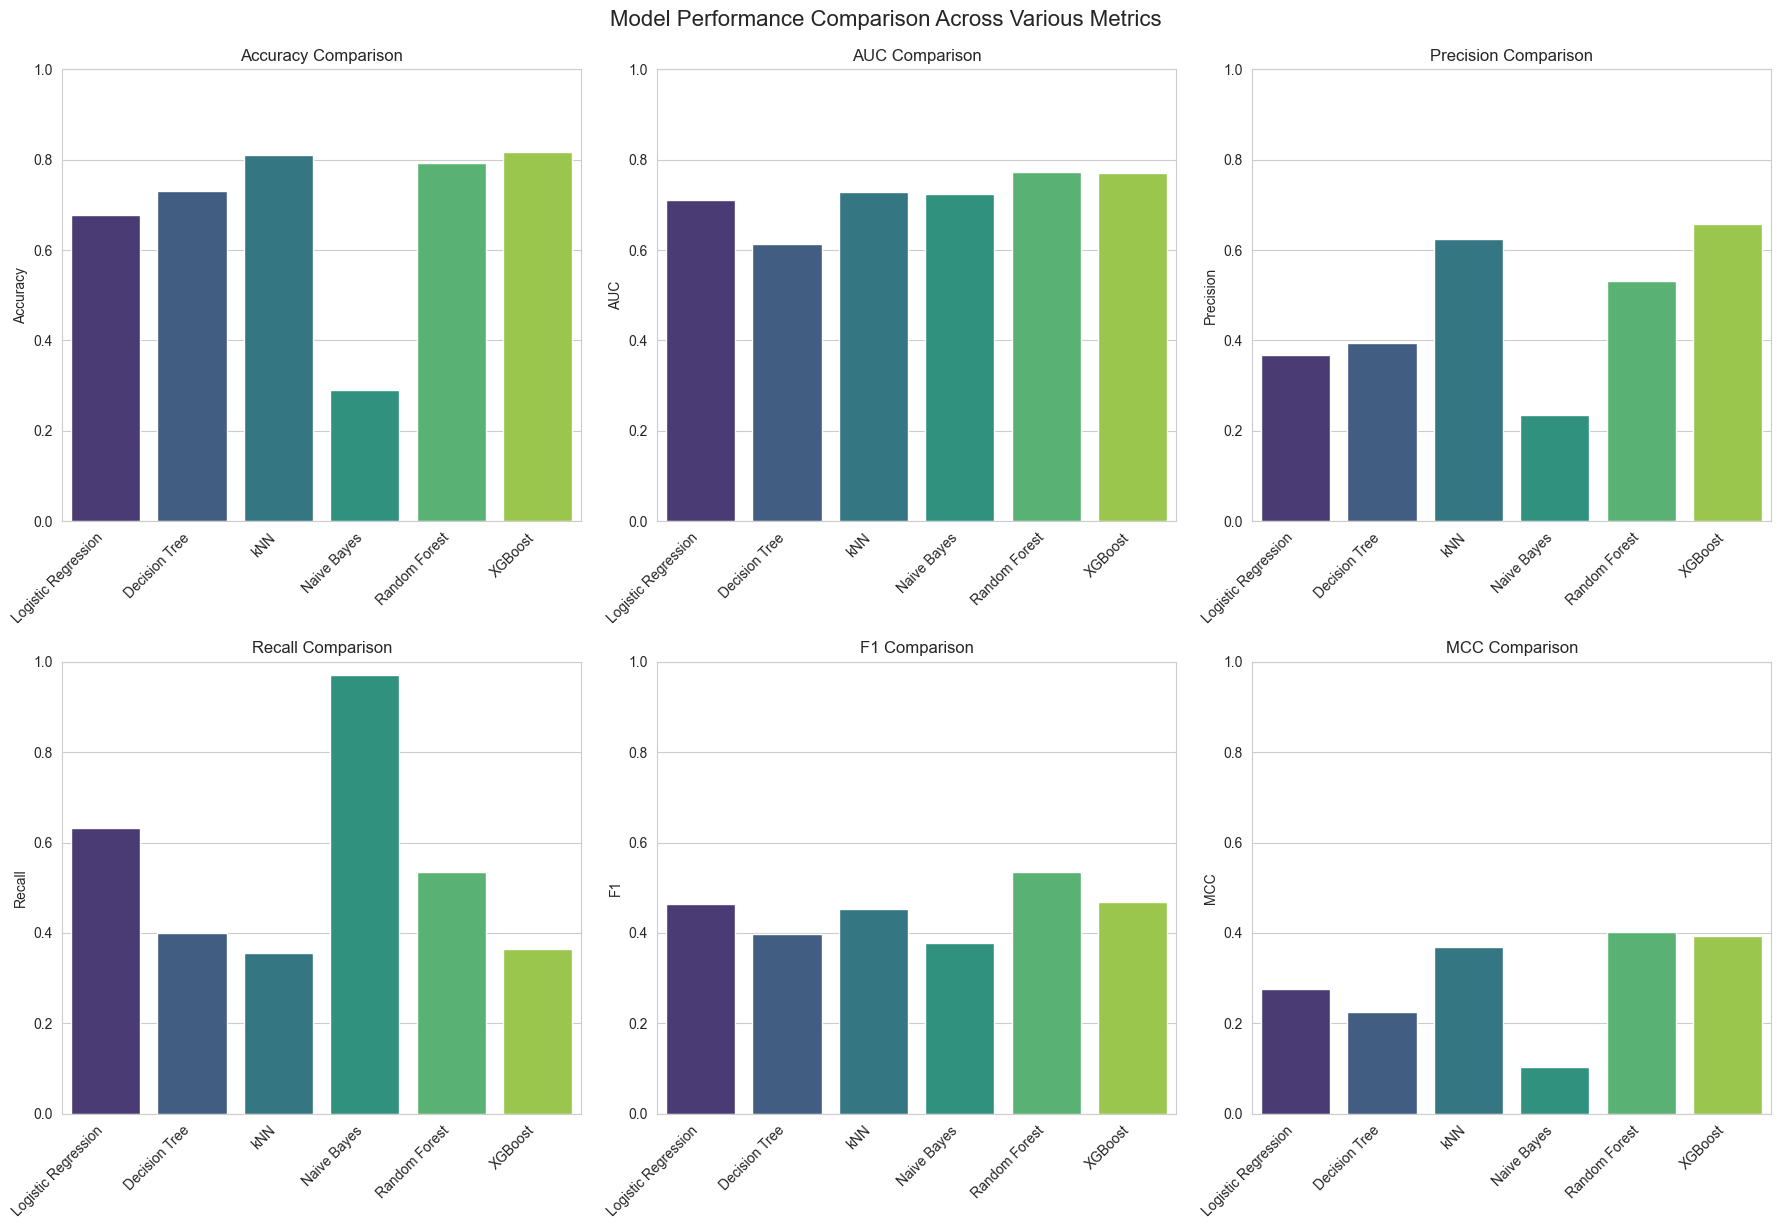

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting (melt the DataFrame)
metrics_to_plot = ["Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"]
results_melted = results_df.melt(id_vars="Model", value_vars=metrics_to_plot, var_name="Metric", value_name="Score")

# Set up the plot aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Create a bar plot for each metric
plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.barplot(x="Model", y="Score", data=results_melted[results_melted["Metric"] == metric], palette="viridis", hue="Model", legend=False)
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("")
    plt.xticks(rotation=45, ha="right") # Rotate model names for better readability
    plt.ylim(0, 1) # Metrics are usually between 0 and 1

plt.tight_layout()
plt.suptitle("Model Performance Comparison Across Various Metrics", y=1.02, fontsize=16)
plt.show()